Problem Statement 1:
There is an automobile company Cars24X7 from India  which aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Japanese market.  Essentially, the company wants to know:
Which variables are significant in predicting the price of a car How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered  a large dataset of different types of cars across the American market.
Business Objectives:
You as a Data scientist are required to apply some data science techniques  for the price of cars with the available independent variables.  That should help the management to understand how exactly the prices vary with the independent variables. 
 They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
 Also build the Random Forest Regressor for optimal search of classifiers.
Dataset: data1.csv
Note : kindly build the project with following pointers
		1.Data understanding and exploration
		2.Data cleaning
		3.Data preparation
		4.Model building and evaluation
		5.Result with error calculation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and understanding data

In [56]:
df=pd.read_csv('car.csv')

In [57]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [58]:
df.shape

(301, 9)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [60]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [61]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [62]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [63]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [64]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

### Data processing and preperation

In [65]:
df['AgeOfCar']=2023-df['Year']

In [66]:
df.drop('Year',axis=1,inplace=True) #dropping year column as we have conerted to aage

In [67]:
df.drop('Car_Name',axis=1,inplace=True)
#dropping this column as it is providing no value 

In [68]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,AgeOfCar
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [69]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,AgeOfCar,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [70]:
X=df.drop('Selling_Price',axis=1) #independent variables
y=df['Selling_Price']  #dependent variable

In [71]:
print(X.shape)
print(y.shape)

(301, 8)
(301,)


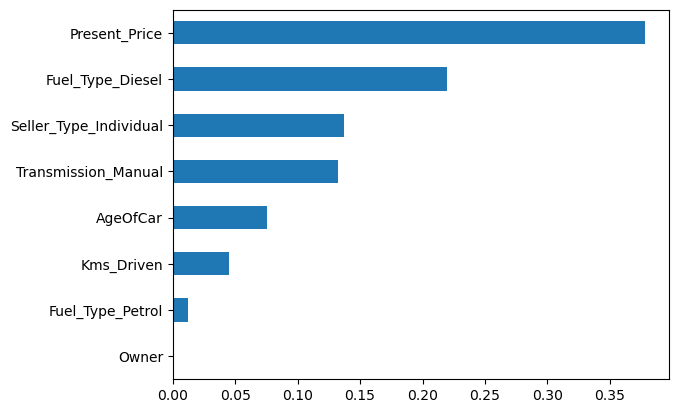

In [72]:
#plotting corelation between independent and dependent variable
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)
feat_imp=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh')
plt.show()

### model creation

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [74]:
X_train

,Present_Price,Kms_Driven,Owner,AgeOfCar,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
273,7.50,61203,0,13,0,1,0,1
260,13.60,29223,0,7,0,1,0,1
211,14.79,43535,0,8,1,0,0,1
134,0.81,11800,0,6,0,1,1,1
11,10.38,51000,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...
8,8.89,20273,0,7,1,0,0,1
73,5.71,43000,0,12,0,1,0,1
118,1.47,26000,0,8,0,1,1,1
189,0.57,55000,0,18,0,1,1,1


In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [83]:
X_train

array([[ 0.00891447,  0.95044836, -0.1393466 , ...,  0.51298918,
        -0.74728947,  0.37796447],
       [ 0.7100795 , -0.20073924, -0.1393466 , ...,  0.51298918,
        -0.74728947,  0.37796447],
       [ 0.84686415,  0.31445141, -0.1393466 , ..., -1.94935887,
        -0.74728947,  0.37796447],
       ...,
       [-0.6842044 , -0.31675792, -0.1393466 , ...,  0.51298918,
         1.33816952,  0.37796447],
       [-0.78765498,  0.72715828, -0.1393466 , ...,  0.51298918,
         1.33816952,  0.37796447],
       [-0.03361521, -0.80347485, -0.1393466 , ...,  0.51298918,
        -0.74728947,  0.37796447]])

In [92]:
#Logistic regression
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8589039971923134

In [93]:
y_pred=model.predict(X_test)

In [98]:
#random forest

from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.9721660612844147

In [99]:
y_pred=model1.predict(X_test)
y_pred

array([ 6.7327,  6.6532,  4.1625,  4.866 ,  2.7265,  9.0655,  7.631 ,
        0.6015, 16.5068,  4.889 ,  5.7011,  7.949 ,  4.021 ,  3.6878,
        0.4915,  3.0215,  7.1623,  0.4924,  7.1484,  0.4206,  4.486 ,
       22.2838, 20.313 ,  1.1155,  2.4865,  4.6075,  5.144 ,  8.3815,
        5.792 ,  4.888 ,  4.5775,  9.3981,  5.1435,  0.288 ,  0.3513,
        5.4052,  8.0885,  5.2805,  1.192 ,  2.625 ,  0.8212,  5.205 ,
       16.4376,  0.1842,  1.1505,  4.44  ,  0.2789,  8.1565,  3.117 ,
        4.8036,  4.4475, 20.2967,  2.4556,  1.1835,  0.3288,  0.2431,
        2.7615,  0.3616,  0.4066,  0.6584,  0.5573])

### calculating error

In [102]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

0.7470845180327876

In [103]:
metrics.mean_absolute_error(y_test,y_pred)

0.5284459016393448

In [104]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.8643405104660938